# Face Super Resolution with Real ESRGAN

---

More Notebooks on Github @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml)

---

Notebook to do image super resolution with a PyTorch implementation of  Real-ESRGAN and a [custom model](https://huggingface.co/sberbank-ai/Real-ESRGAN) by [sberbank-ai](https://github.com/ai-forever) which performs better on faces.

[Image Super-Resolution](https://paperswithcode.com/task/image-super-resolution) techniques reconstruct a higher-resolution image or sequence from the observed lower-resolution images. In particular we do single-image super-resolution (SISR) which just uses a single input image.

The notebook is structured as follows:
* Setting up the Environment
* Getting the data
* Using the Models (Running Inference)

# Setting up the Environment

#### Setup Runtime

The models can run on `CPU` but take a few minutes, if you want to run on many images and you want the inference fast, choose a `GPU` hardware accelerator. `Runtime` > `Change runtime type` > `GPU`.

#### Setup Dependencies

We need to download the pre-trained Real-ESRGAN model from the Huggingface Hub. We use `git` to clone the repository and check out the model files with `git lfs` which is the large file system (each of the models is about 65mb).

In [ ]:
!GIT_LFS_SKIP_SMUDGE=1 git clone https://huggingface.co/sberbank-ai/Real-ESRGAN
%cd Real-ESRGAN
!git lfs fetch
!git lfs checkout

Cloning into 'Real-ESRGAN'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 34 (delta 8), reused 28 (delta 4), pack-reused 0
Unpacking objects: 100% (34/34), done.
/content/Real-ESRGAN
Fetching main
Git LFS: (3 of 3 files) 191.97 MB / 191.97 MB
Git LFS: (3 of 3 files) 191.97 MB / 191.97 MB


We do a quick check to list the files in the `Real-ESRGAN` folder have been successfully checked out. We should see the `RealESRGAN_x2.pth` file, which contains the model weights for the x2 super resolution model be about `64M` in size. There are also models for x4 and x8 super resolution.

In [ ]:
!ls -lh

total 192M
-rw-r--r-- 1 root root 1.2K Nov 22 09:43 README.md
-rw-r--r-- 1 root root  64M Nov 22 09:43 RealESRGAN_x2.pth
-rw-r--r-- 1 root root  64M Nov 22 09:43 RealESRGAN_x4.pth
-rw-r--r-- 1 root root  65M Nov 22 09:43 RealESRGAN_x8.pth


Now we want to get all the necessary libraries and this include PyTorch and torchvision. There are usually pre-installed versions on Google Colab so this step should be fast.

In [ ]:
!pip install -q torch torchvision

Next we install the Real-ESRGAN library to do the actual super resolution.

In [ ]:
!pip install -q git+https://github.com/sberbank-ai/Real-ESRGAN.git

# Getting Data

#### Getting a Sample Image

* An 256x256 Low Resolution (LR) image with a face in the foreground.

We'll download this image to our local storage with `wget` and view a preview in our notebook.

In [ ]:
!wget -q https://raw.githubusercontent.com/ai-forever/Real-ESRGAN/main/inputs/lr_face.png

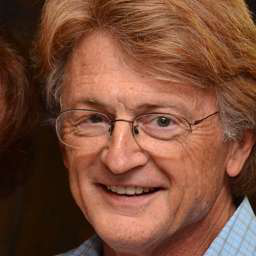

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# display the image in the notebook
cv2_imshow(cv2.imread('lr_face.png'))

# Using the Model (Running Inference)

Now we want to load the x4 pre-trained model checkpoint, `RealESRGAN_x4.pth`, from our local storage to memory.

In [ ]:
import torch
from RealESRGAN import RealESRGAN

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = RealESRGAN(device, scale=4)
model.load_weights('RealESRGAN_x4.pth', download=False)

/usr/local/lib/python3.7/dist-packages/torch/amp/autocast_mode.py:198: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Next we use the model for inference on the LR image that we downloaded on disk. First we read the LR image using, then we call `.predict(image)` to pass it into the model for inference. The super resolution image is produced and we save it to disk as `sr_face.png`.

In [ ]:
from PIL import Image
import numpy as np

path_to_image = 'lr_face.png'
image = Image.open(path_to_image).convert('RGB')

sr_image = model.predict(image)

sr_image.save('sr_face.png')

We'll preview the super resolution image in our notebook.

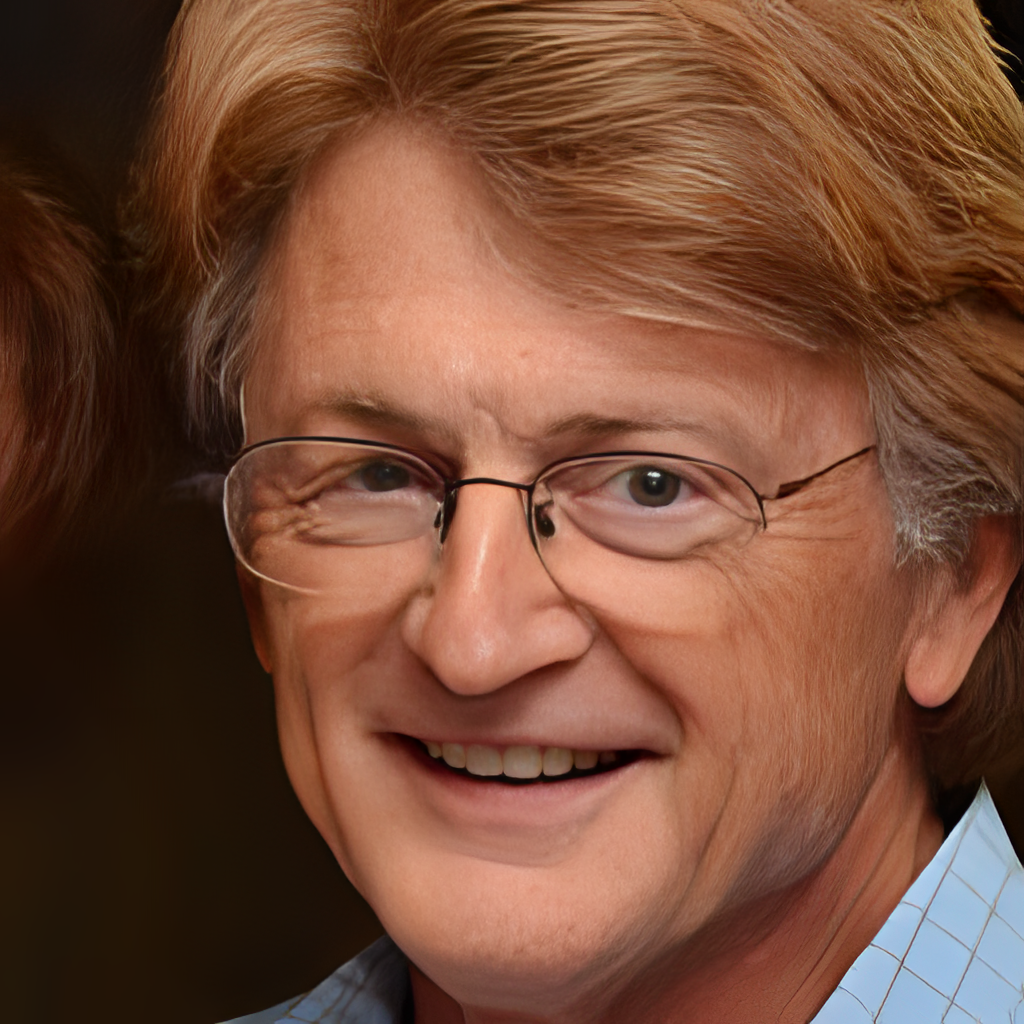

In [ ]:
cv2_imshow(cv2.imread('sr_face.png'))

We can connect to Google Drive with the following code. You can also click the `Files` icon on the left panel and click `Mount Drive` to mount your Google Drive.

The root of your Google Drive will be mounted to `/content/drive/My Drive/`. If you have problems mounting the drive, you can check out this [tutorial](https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166).

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

You can move the output files which are saved in the `/content/` directory to the root of your Google Drive.

In [ ]:
import shutil
shutil.move('sr_face.png', '/content/drive/My Drive/sr_face.png')

More Notebooks @ [eugenesiow/practical-ml](https://github.com/eugenesiow/practical-ml) and do star or drop us some feedback on how to improve the notebooks on the [Github repo](https://github.com/eugenesiow/practical-ml/).